In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/multiclass_dataset.csv')
df.sample(5)

,_id,segment_id,date,weekday,period,LOS,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type,long_snode,lat_snode,long_enode,lat_enode
16719,16719,41654,2020-08-02,6,period_23_30,F,4217007492,4217006583,14,242003626,NaN,4,Lạc Long Quân,tertiary,106.642441,10.767065,106.642345,10.766973
2004,2004,4400,2021-01-04,0,period_12_00,E,3095384125,5769343551,33,32578733,NaN,4,Hồng Lạc,tertiary,106.648978,10.786112,106.649225,10.785934
14139,14139,36235,2021-01-05,1,period_3_30,E,5765292370,2288699462,36,219730466,NaN,2,Hoàng Văn Thụ,primary,106.657797,10.797423,106.657556,10.797194
271,271,2100,2020-08-02,6,period_23_30,D,366371762,4924631875,19,32577244,NaN,4,Tôn Thất Hiệp,tertiary,106.652609,10.763775,106.652527,10.763624
8117,8117,21652,2020-12-26,5,period_10_00,A,1497276493,5757535100,56,39370310,NaN,4,Bùi Hữu Nghĩa,tertiary,106.699404,10.799116,106.699556,10.799606


In [3]:
for i in df.columns:
  print(f"{i}",len(df[i].unique()))

_id 33441
segment_id 10027
date 122
weekday 7
period 46
LOS 6
s_node_id 8430
e_node_id 8427
length 314
street_id 1967
max_velocity 12
street_level 4
street_name 696
street_type 26
long_snode 8400
lat_snode 8388
long_enode 8391
lat_enode 8384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33441 entries, 0 to 33440
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           33441 non-null  int64  
 1   segment_id    33441 non-null  int64  
 2   date          33441 non-null  object 
 3   weekday       33441 non-null  int64  
 4   period        33441 non-null  object 
 5   LOS           33441 non-null  object 
 6   s_node_id     33441 non-null  int64  
 7   e_node_id     33441 non-null  int64  
 8   length        33441 non-null  int64  
 9   street_id     33441 non-null  int64  
 10  max_velocity  4946 non-null   float64
 11  street_level  33441 non-null  int64  
 12  street_name   33440 non-null  object 
 13  street_type   33441 non-null  object 
 14  long_snode    33441 non-null  float64
 15  lat_snode     33441 non-null  float64
 16  long_enode    33441 non-null  float64
 17  lat_enode     33441 non-null  float64
dtypes: float64(5), int64(8), o

In [5]:
df.isnull().sum()

_id                 0
segment_id          0
date                0
weekday             0
period              0
LOS                 0
s_node_id           0
e_node_id           0
length              0
street_id           0
max_velocity    28495
street_level        0
street_name         1
street_type         0
long_snode          0
lat_snode           0
long_enode          0
lat_enode           0
dtype: int64

In [6]:
obj=[]
for i in df.columns:
  if df[i].dtype == 'object':
    print(i)
    obj.append(i)

date
period
LOS
street_name
street_type


Text(0.5, 1.0, 'Level Of Service')

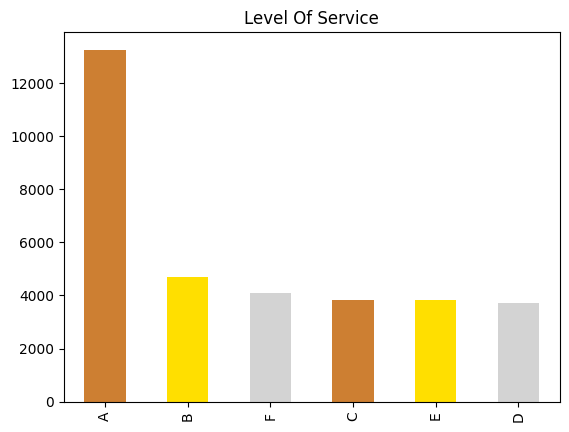

In [7]:
df['LOS'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'])
plt.title('Level Of Service')

In [8]:
le = LabelEncoder()
for col  in obj:
  df[col]=le.fit_transform(df[col])

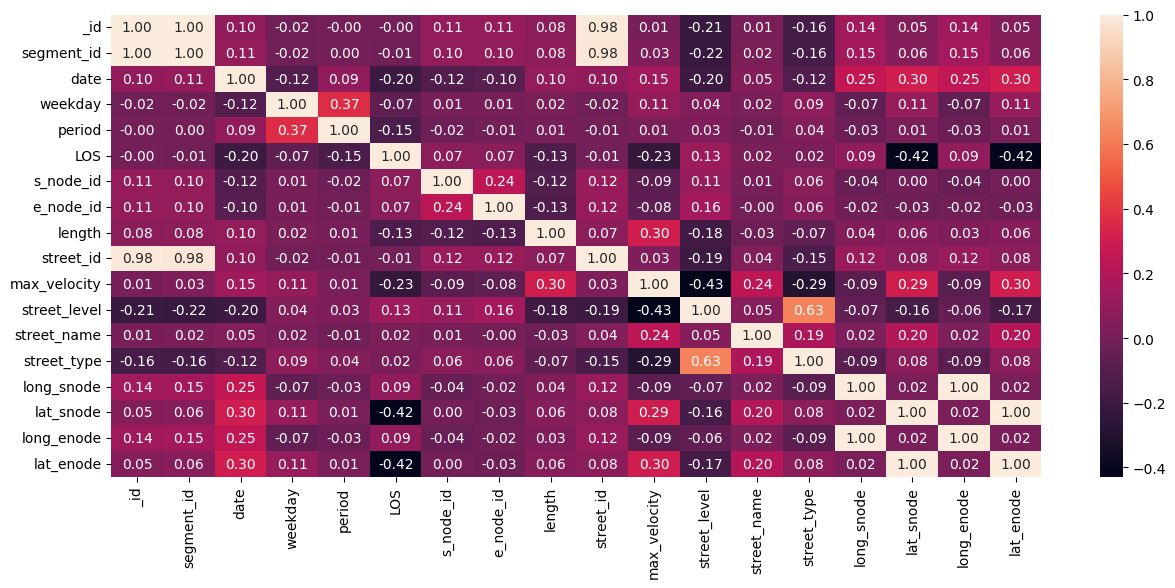

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [10]:
correlations = df.corr()['LOS'].drop('LOS')
print(correlations)

_id            -0.002125
segment_id     -0.011695
date           -0.204164
weekday        -0.074147
period         -0.146667
s_node_id       0.068815
e_node_id       0.067959
length         -0.134285
street_id      -0.006513
max_velocity   -0.229388
street_level    0.128731
street_name     0.021579
street_type     0.017071
long_snode      0.092482
lat_snode      -0.422390
long_enode      0.093115
lat_enode      -0.422594
Name: LOS, dtype: float64


In [11]:
df.columns

Index(['_id', 'segment_id', 'date', 'weekday', 'period', 'LOS', 's_node_id',
       'e_node_id', 'length', 'street_id', 'max_velocity', 'street_level',
       'street_name', 'street_type', 'long_snode', 'lat_snode', 'long_enode',
       'lat_enode'],
      dtype='object')

Tried to use autoencoder to fill missing values

In [12]:
# from keras.models import Sequential
# from keras.layers import Dense

# features = ['segment_id', 'weekday', 'period', 'LOS', 's_node_id', 'e_node_id', 'length', 'street_id', 'street_level', 'long_snode', 'lat_snode', 'long_enode', 'lat_enode']

# df_autoencoder = df[features + ['max_velocity']].dropna()


# scaler = StandardScaler()
# df_autoencoder[features] = scaler.fit_transform(df_autoencoder[features])

# X_train, X_test, y_train, y_test = train_test_split(df_autoencoder[features], df_autoencoder['max_velocity'], test_size=0.2, random_state=42)


# model = Sequential([
#     Dense(8, activation='relu', input_shape=(len(features),)),
#     Dense(4, activation='relu'),
#     Dense(8, activation='relu'),
#     Dense(len(features), activation='linear')
# ])


# model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train, X_train, epochs=500, batch_size=32, validation_data=(X_test, X_test))

# predicted_values = model.predict(df[features].values)

# df['max_velocity'] = np.where(df['max_velocity'].isnull(), predicted_values[:, -1], df['max_velocity'])


In [13]:
mode_value = df['max_velocity'].mode().values[0]
df['max_velocity'] = df['max_velocity'].fillna(mode_value)

In [14]:
df.isnull().sum()

_id             0
segment_id      0
date            0
weekday         0
period          0
LOS             0
s_node_id       0
e_node_id       0
length          0
street_id       0
max_velocity    0
street_level    0
street_name     0
street_type     0
long_snode      0
lat_snode       0
long_enode      0
lat_enode       0
dtype: int64

In [15]:
unique_street_types = df['street_type'].unique()
np.sort(unique_street_types)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [16]:
df.drop(['_id', 'segment_id', 'date', 'weekday', 'period','s_node_id','e_node_id','street_id','street_name', 'long_snode', 'lat_snode'],axis=1,inplace=True)

In [17]:
df.dropna(inplace=True)

In [18]:
df.LOS.value_counts()

0    13278
1     4700
5     4089
2     3839
4     3828
3     3707
Name: LOS, dtype: int64

<Axes: >

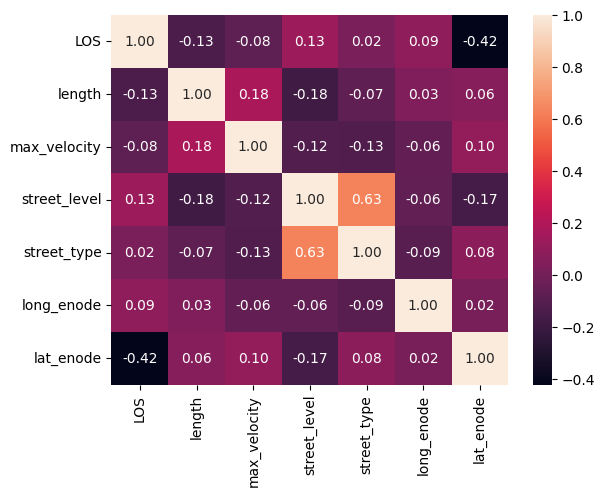

In [19]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

In [20]:
for col in df.columns:
  print(f'{col} {df[col].unique()}')

LOS [0 2 3 1 4 5]
length [ 116   26    7    8   43   21    9   67   25   47   10   52   35   54
   49   15   95   14   89   39   42   50   69   73   34   24   90   40
   16  127  102  101   58  114   11  204    5   27   30    4   19   29
   28   36   33   18   12   75   23    6   72   13   38   31   37    3
    2   20   22   48   32   17   92  209   51   41   61    1   55   64
   86   71   70   56   57   63   81   99   62  145  117   46   68  107
   96   94  112  142   65  105   45   85   53   78   60   88  111   74
  273   79   44   59   66   91  489  110  219   83  199  148  182  120
  203  359  232   80   77  198  159  108  113  136  135   76   87  103
  285  156  141  121  133  193   84  146   98  257  122  109  119   93
  349  163  151  196  150  171  106  223  118  149   97    0  214  155
  304  104  126  100  189  134  303  144  115  183  147  185  247  139
  138  338  637  246  123  153  140  152  507  523  526  511  512  202
  228  124   82  129  166  137  205  176  542  131  

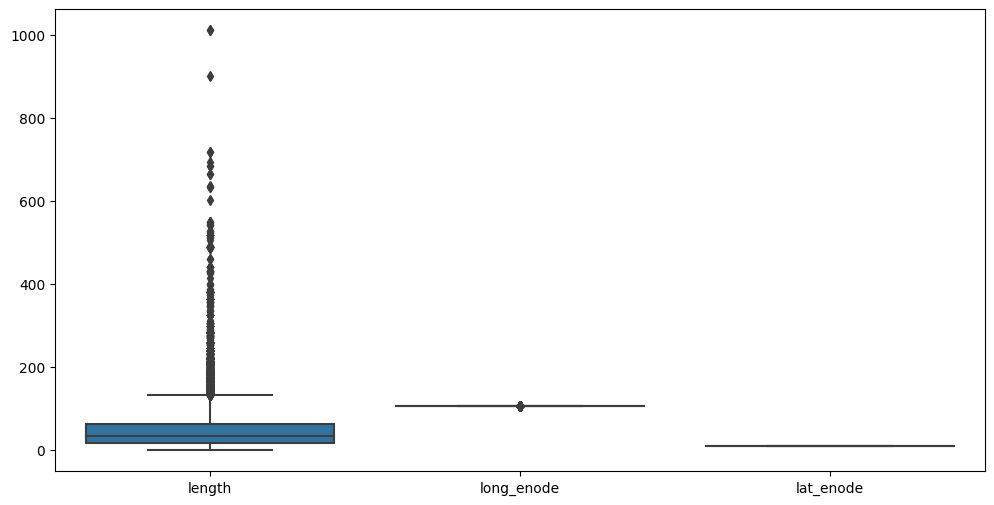

In [21]:
outliers = ['length', 'long_enode', 'lat_enode']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[outliers], orient="v")
plt.show()

<Axes: >

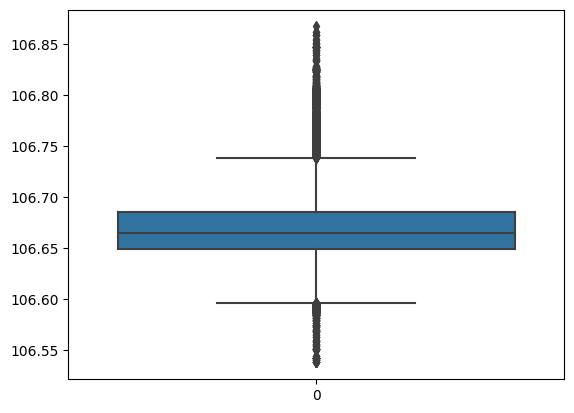

In [22]:
sns.boxplot(df['long_enode'])

<Axes: >

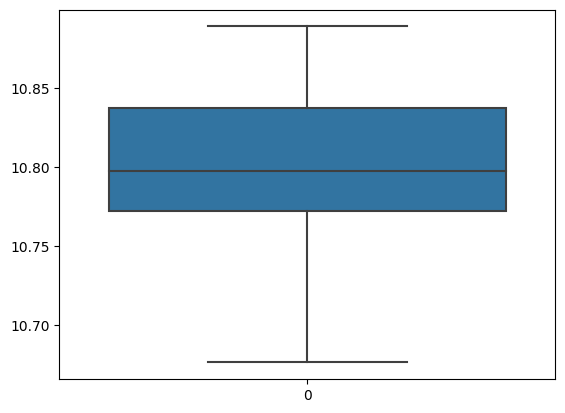

In [23]:
sns.boxplot(df['lat_enode'])

In [24]:
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['length'] >= upper)[0]
lower_array = np.where(df['length'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

In [25]:
df = df.reset_index()

In [26]:
Q1 = df['long_enode'].quantile(0.25)
Q3 = df['long_enode'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['long_enode'] >= upper)[0]
lower_array = np.where(df['long_enode'] <= lower)[0]

df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

print("New Shape: ", df.shape)


New Shape:  (28219, 8)


In [27]:
X = df.drop('LOS',axis=1)
y= df.LOS

In [28]:
print("X shape :",X.shape)
print("y Shape :",y.shape)

X shape : (28219, 7)
y Shape : (28219,)


In [29]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='auto'))
X, y = resample.fit_resample(X, y)

In [30]:
X.shape,y.shape

((51342, 7), (51342,))

In [31]:
y.value_counts()

0    10274
1     9190
5     8523
2     7862
4     7807
3     7686
Name: LOS, dtype: int64

In [60]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [61]:
Scaler = StandardScaler()
X_train= Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [62]:
rfc = RandomForestClassifier(class_weight='balanced',n_jobs=-1,n_estimators=100,oob_score = True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))

Accuracy score: 0.7075664621676891


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2055
           1       0.84      0.84      0.84      1838
           2       0.60      0.60      0.60      1573
           3       0.58      0.58      0.58      1537
           4       0.59      0.57      0.58      1561
           5       0.72      0.72      0.72      1705

    accuracy                           0.71     10269
   macro avg       0.69      0.70      0.69     10269
weighted avg       0.71      0.71      0.71     10269



<Axes: >

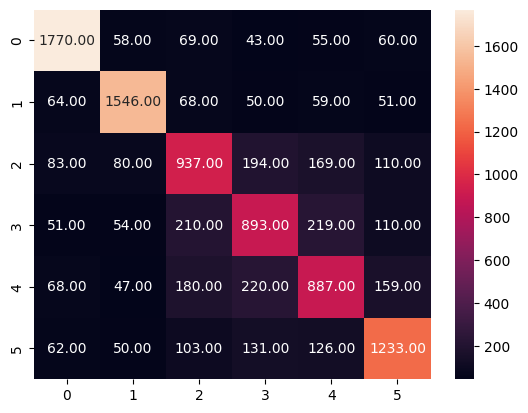

In [63]:
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')

In [64]:
rfc.oob_score_

0.7082755094587685

In [41]:
kfold = KFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')

for i, score in enumerate(cv_scores, start=1):
    print(f'Fold {i}: {score:.4f}')

print(f'Mean Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

Fold 1: 0.6942
Fold 2: 0.6932
Fold 3: 0.6909
Fold 4: 0.6958
Fold 5: 0.6892
Mean Accuracy: 0.6927
Standard Deviation: 0.0023


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2055
           1       0.84      0.83      0.84      1838
           2       0.59      0.60      0.60      1573
           3       0.57      0.59      0.58      1537
           4       0.58      0.57      0.57      1561
           5       0.72      0.72      0.72      1705

    accuracy                           0.70     10269
   macro avg       0.69      0.69      0.69     10269
weighted avg       0.70      0.70      0.70     10269



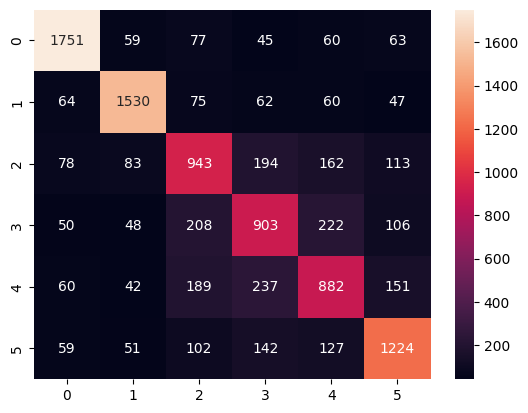

In [69]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(n_estimators=100,n_jobs=-1)
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2055
           1       0.85      0.83      0.84      1838
           2       0.60      0.60      0.60      1573
           3       0.58      0.60      0.59      1537
           4       0.58      0.58      0.58      1561
           5       0.72      0.72      0.72      1705

    accuracy                           0.71     10269
   macro avg       0.70      0.70      0.70     10269
weighted avg       0.71      0.71      0.71     10269



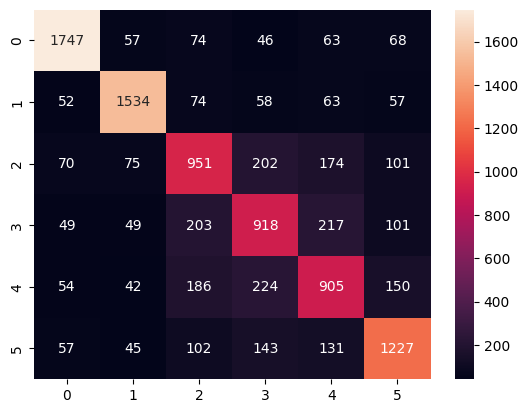

In [75]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,class_weight='balanced')
brf.fit(X_train,y_train)
y_pred = brf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2055
           1       0.85      0.83      0.84      1838
           2       0.60      0.60      0.60      1573
           3       0.58      0.60      0.59      1537
           4       0.58      0.58      0.58      1561
           5       0.72      0.72      0.72      1705

    accuracy                           0.71     10269
   macro avg       0.70      0.70      0.70     10269
weighted avg       0.71      0.71      0.71     10269



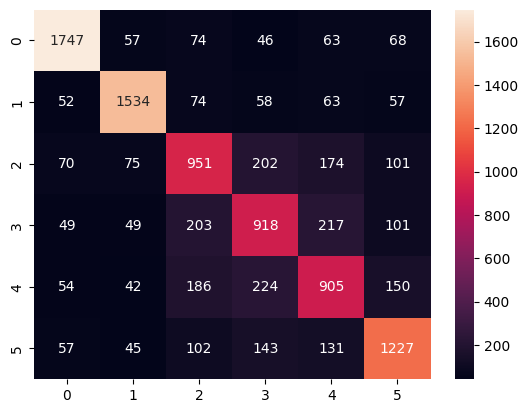

In [77]:
from imblearn.ensemble import  RUSBoostClassifier
rus = RUSBoostClassifier(estimator=None,n_estimators=200, learning_rate=1.0, algorithm='SAMME.R', sampling_strategy='auto', replacement=True,base_estimator='deprecated')
rus.fit(X_train,y_train)
y_predr = brf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_predr),annot=True,fmt='d')
print(classification_report(y_test,y_predr))